# Segmentação de Moedas

#### ***Requisitos***
  • Identifique a localização de moedas, desenhando um Bounding-Box.
  
  • Forneça análise crítica da solução: Explique a abordagem, detalhando criticamente porque utilizou certas funções. Ilustre e discuta tecnicamente o desepenho da solução. Demostre casosde acerto e erro, discutindo estes resultados. Alterne células de código e discussão, sempre que achar necessário

  • Determine o valor da moeda. Avalie o desempenho através de uma Matriz de Confusão e Percentuais. (Ponto extra 2PTS)

Nomes:
Alex Cohen, Gabriel Scholze, Matheus Muller e Yerik K.

In [ ]:
!wget https://ppgia.pucpr.br/~aghochuli/moedas.zip -O moedas.zip
!unzip moedas.zip

--2023-09-02 17:49:35--  https://ppgia.pucpr.br/~aghochuli/moedas.zip
Resolving ppgia.pucpr.br (ppgia.pucpr.br)... 104.18.10.132, 104.18.11.132, 2606:4700::6812:b84, ...
Connecting to ppgia.pucpr.br (ppgia.pucpr.br)|104.18.10.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78619221 (75M) [application/zip]
Saving to: ‘moedas.zip’

moedas.zip          100%[===================>]  74.98M   225MB/s    in 0.3s    

2023-09-02 17:49:36 (225 MB/s) - ‘moedas.zip’ saved [78619221/78619221]

Archive:  moedas.zip
   creating: moedas/
  inflating: moedas/100_1477154442.jpg  
  inflating: moedas/100_1477154454.jpg  
  inflating: moedas/100_1477154466.jpg  
  inflating: moedas/100_1477154472.jpg  
  inflating: moedas/100_1477154478.jpg  
  inflating: moedas/100_1477154490.jpg  
  inflating: moedas/100_1477154496.jpg  
  inflating: moedas/100_1477154502.jpg  
  inflating: moedas/100_1477154508.jpg  
  inflating: moedas/100_1477154514.jpg  
  inflating: moedas/100_14771545

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Auxiliary Function to plot side by side
def plot_sidebyside(img_list, titles, figsize, colormap=None):

  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize= figsize)

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')

  # Combine all the operations and display
  plt.show()


def detecta_moeda(image):
    #read image from disk
    img_plate = cv2.imread(image)
    #converts to rgb to better visualize
    img_plate = cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB)
    img_plate = cv2.bilateralFilter(img_plate,9,75,75)

    hsv = cv2.cvtColor(img_plate,cv2.COLOR_BGR2HSV)

    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]

    img = hsv[:,:,1]

    val = 40
    _,thresh = cv2.threshold(img,val,256,cv2.THRESH_BINARY)
    kernel = np.array(create_ellipse_matrix(17,1,1), dtype=np.uint8)
    im_erode = cv2.dilate(thresh,kernel)
    kernel = np.array(create_ellipse_matrix(8,1,1), dtype=np.uint8)
    im_open = cv2.erode(im_erode,kernel)

    connectivity = 4  # You need to choose 4 or 8 for connectivity type
    num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(im_open , connectivity , cv2.CV_32S)
    for i in range(num_labels):
        temp = cc_image.copy()

        temp[cc_image == i] = 255
        temp[cc_image != i] = 0

        x,y,w,h = stats[i][:4]

        if w >= 100 or h >= 100 or w <= 40 or h <= 40:
            continue
        aspect = abs(1.0 - w/h)
        if aspect > 0.1:
            continue

        area = stats[i][4]
        cx,cy = centroids[i]
        component = img_plate[y:y+h, x:x+w]
        markup = cv2.rectangle(temp,(x,y),(x+w,y+h),(255,0,0),thickness=1)
        plt.imshow(temp,cmap='gray')
        plt.show()
        print(f"avg size: {(w+h)/2}; avg hue: {np.average(hsv[:,:,0])/255}; avg sat: {np.average(hsv[:,:,1])/255};  avg value: {np.average(hsv[:,:,2])/255}")

In [ ]:
lista_moedas = ['moedas/5_1477188798.jpg', 'moedas/5_1477188804.jpg', 'moedas/10_1477288566.jpg', 'moedas/10_1477149102.jpg', 'moedas/25_1477285410.jpg', 'moedas/25_1477285428.jpg', 'moedas/50_1477145076.jpg', 'moedas/50_1477145082.jpg', 'moedas/100_1477154958.jpg', 'moedas/100_1477154964.jpg']

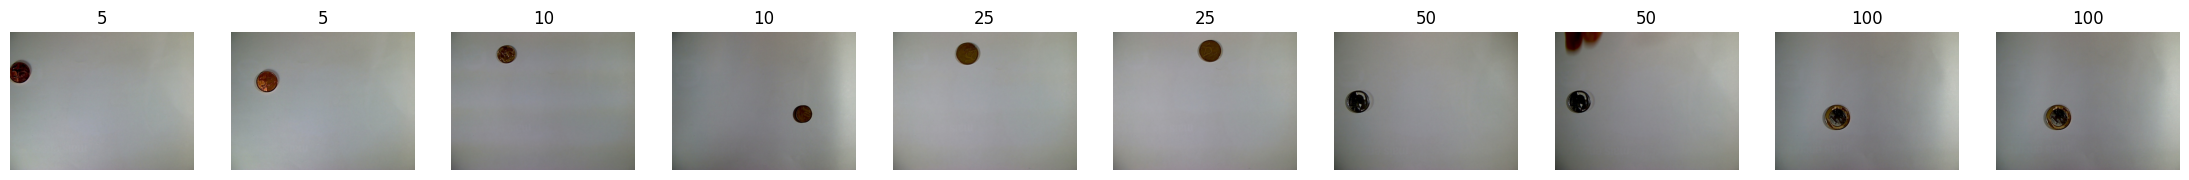

In [ ]:
moedas = []

for moeda in lista_moedas:
    img_plate = cv2.imread(moeda)
    moedas.append(cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB))

plot_sidebyside(moedas, ['5','5','10','10','25','25','50','50','100','100'], figsize=(28,24))

#Seção 1: Preprocessamento

Aqui implemente as funções que achar necessário para processar as imagens. Como visto nas aulas passadas, avalie os diversos filtros, morphologias, sistemas de cor, thresholds. O output esperado dessa dessa seção é uma lista de imagens preprocessadas, restando apenas o máximo do objeto de interesse que conseguir. Os códigos das Lectures 01, 02, 03 são de grande valia aqui.

Apresente o seu pipeline sempre justificando as escolhas. Você é livre para demostrar funções e resultados que atingiu, inclusive funções que deram errado.

Ao fim desta seção produza uma crítica do que deu certo e o que deu errado.

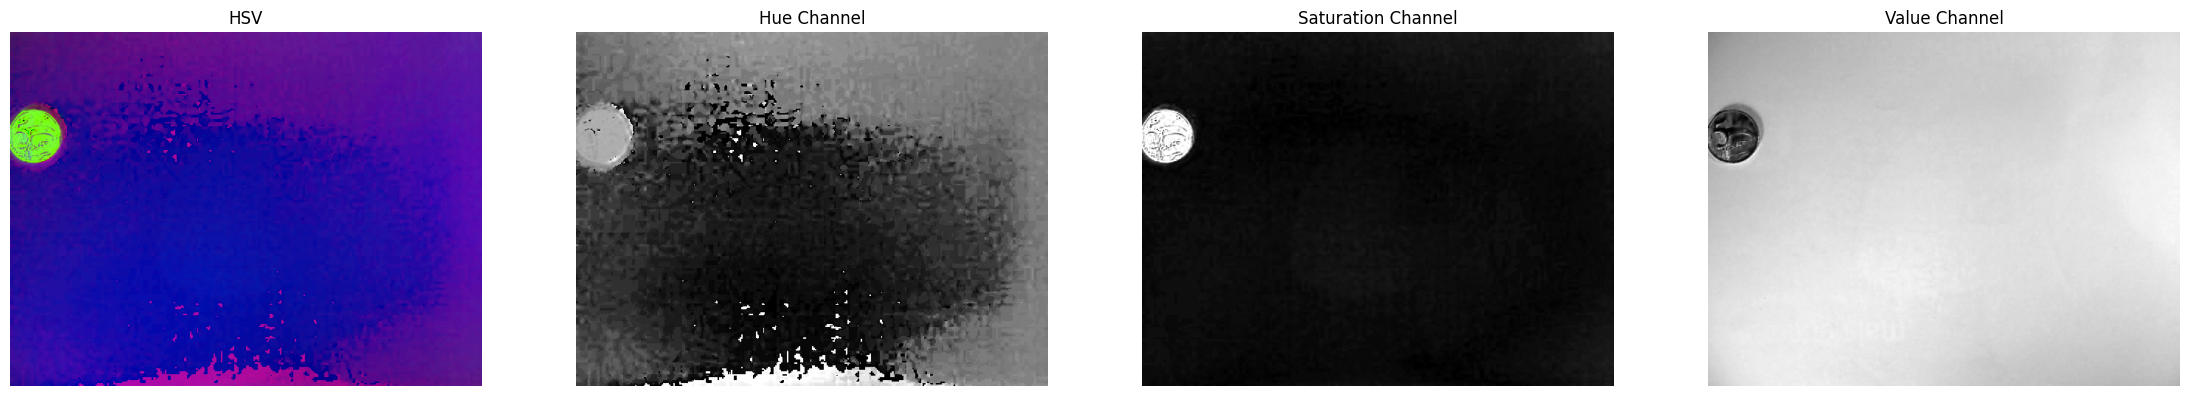

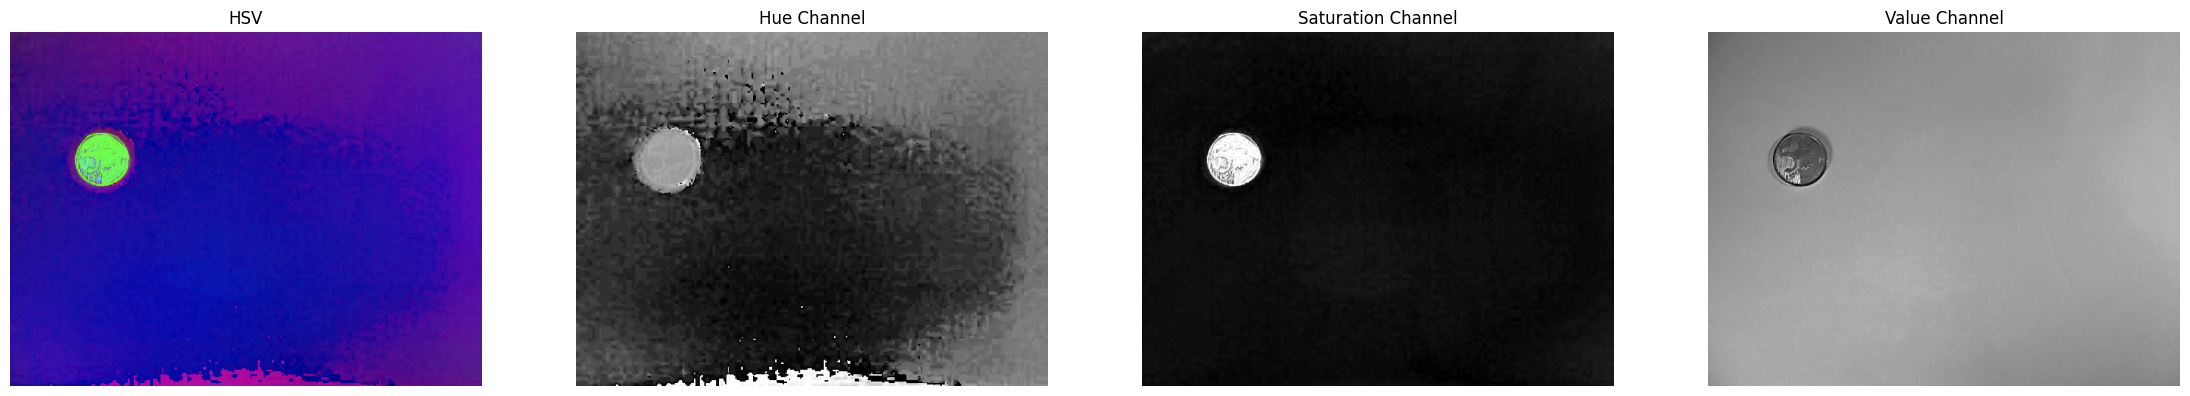

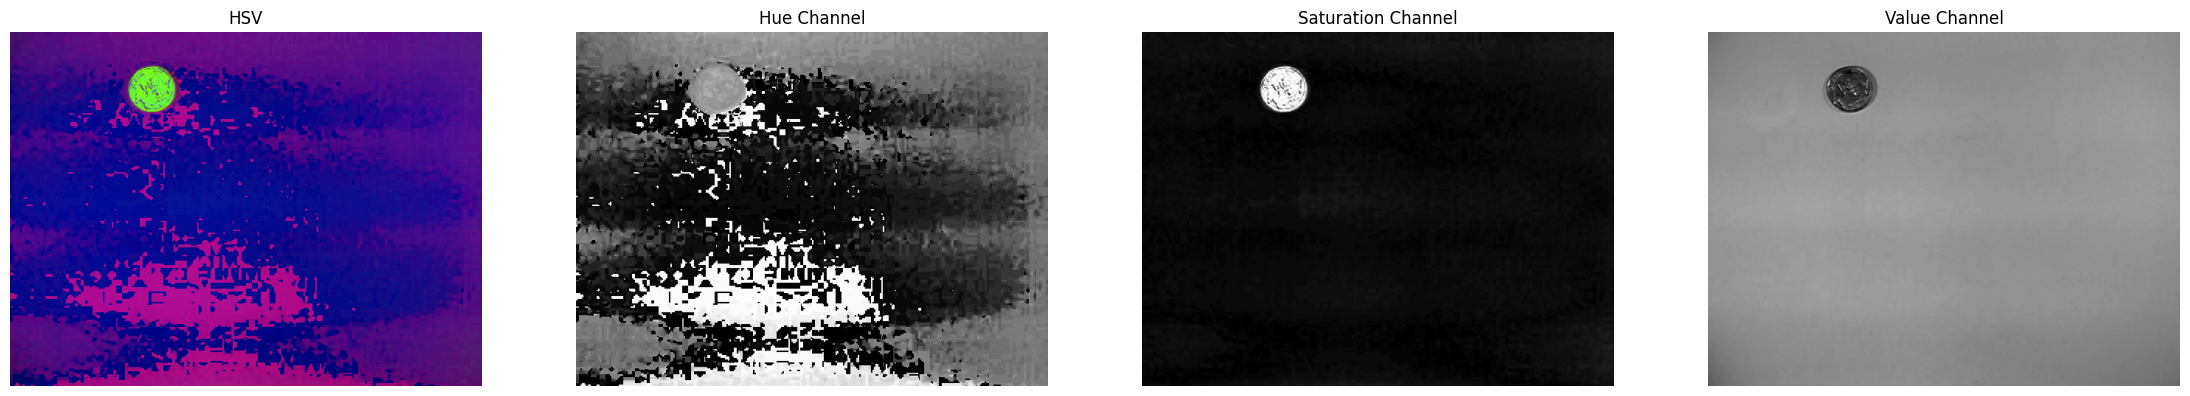

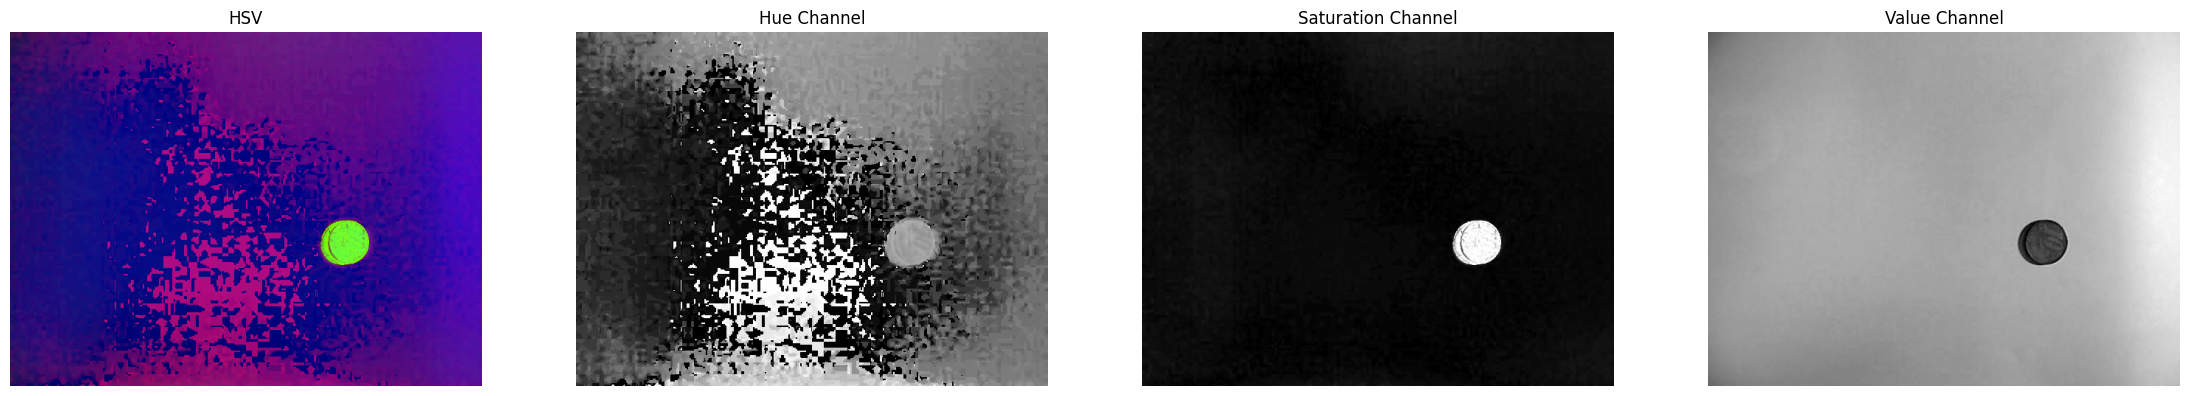

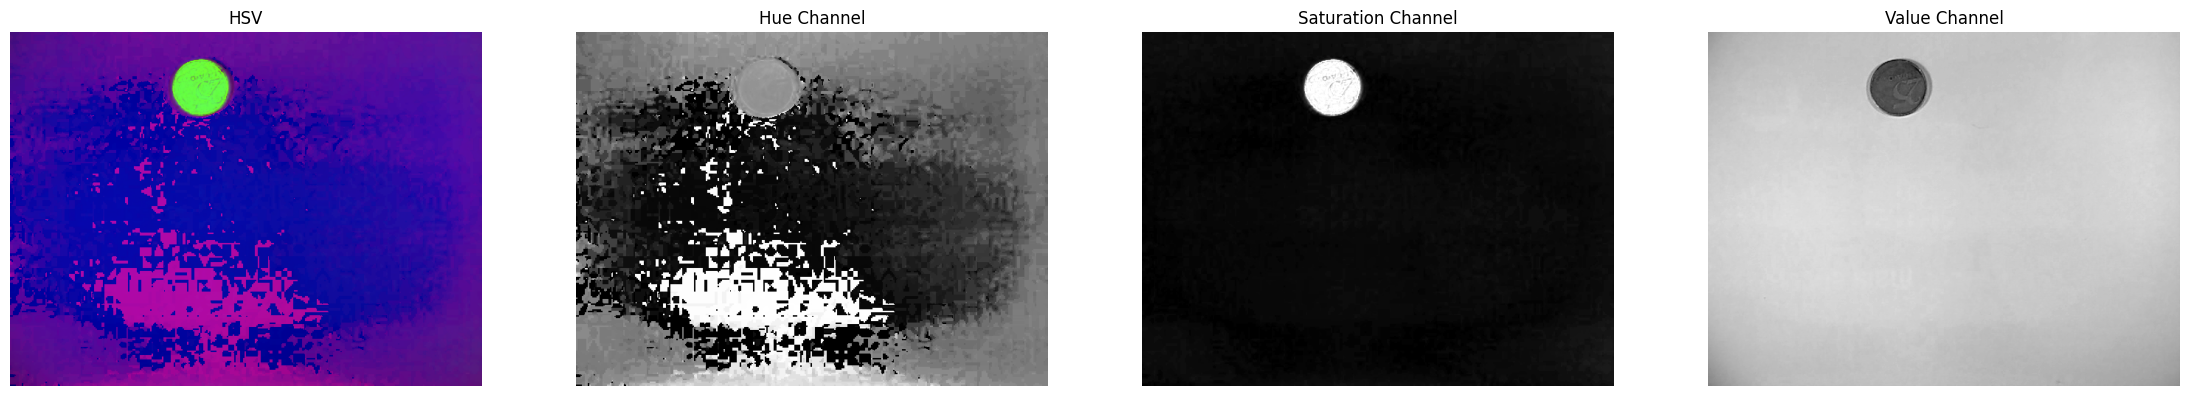

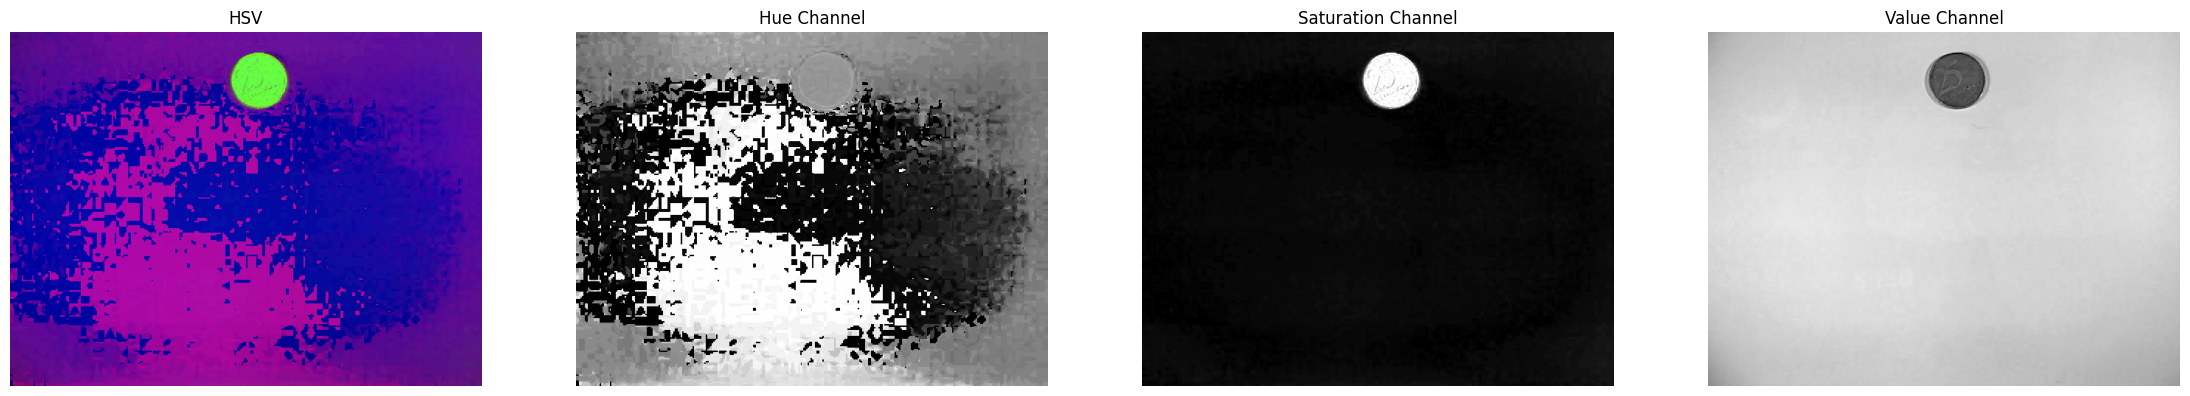

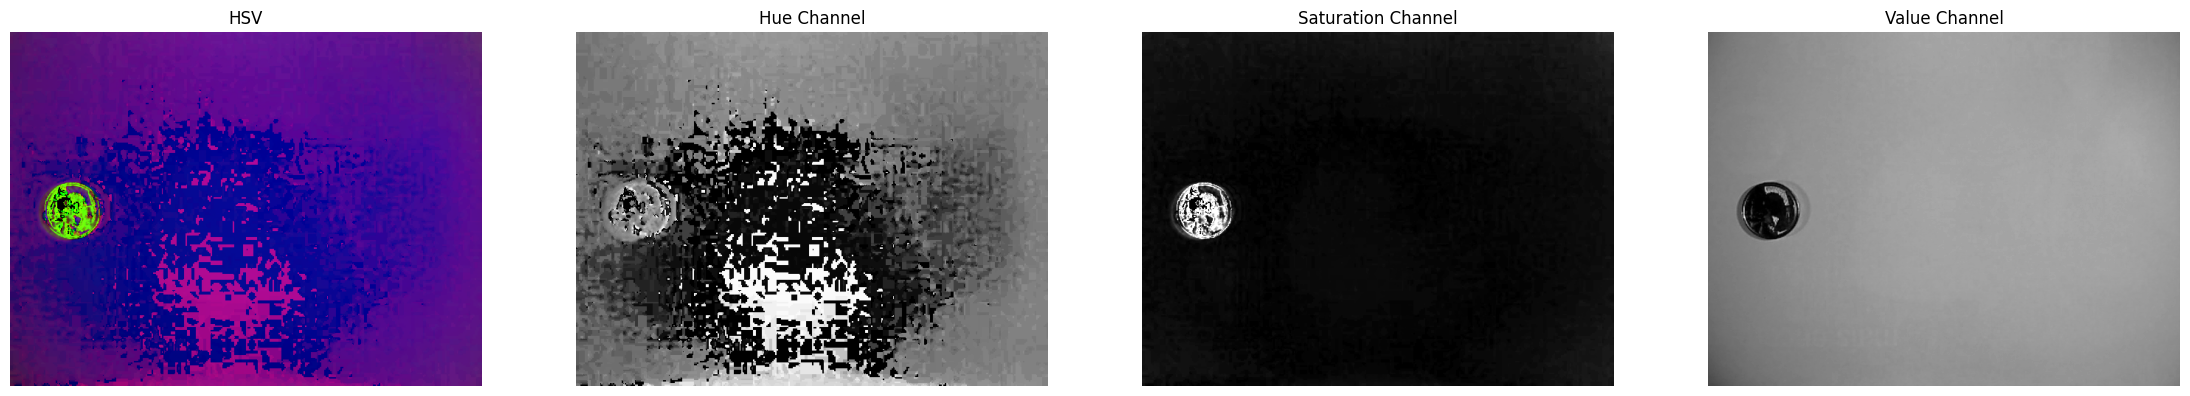

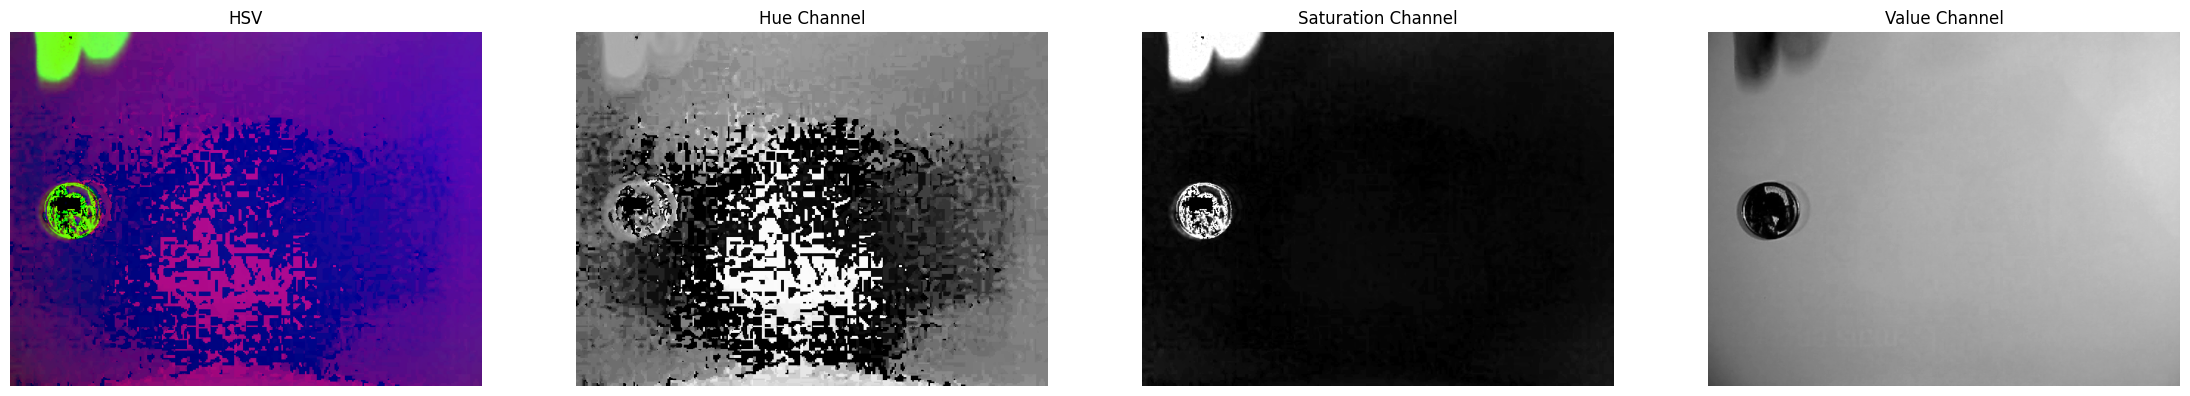

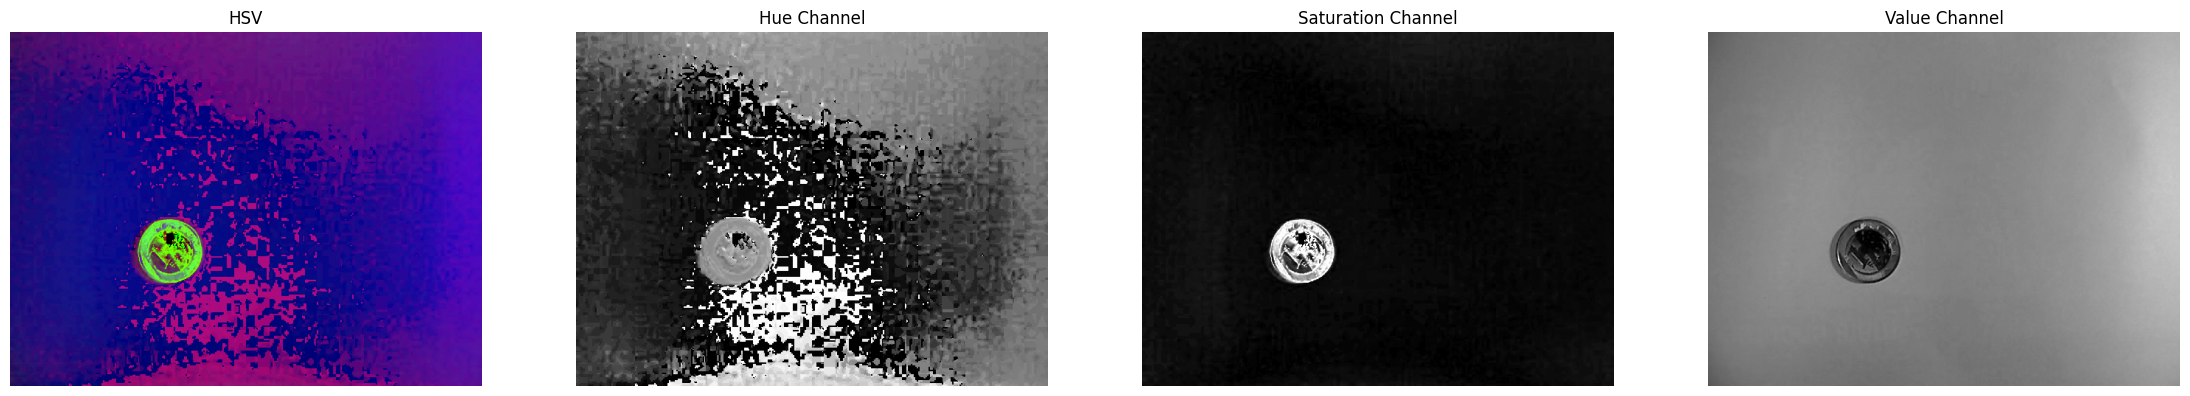

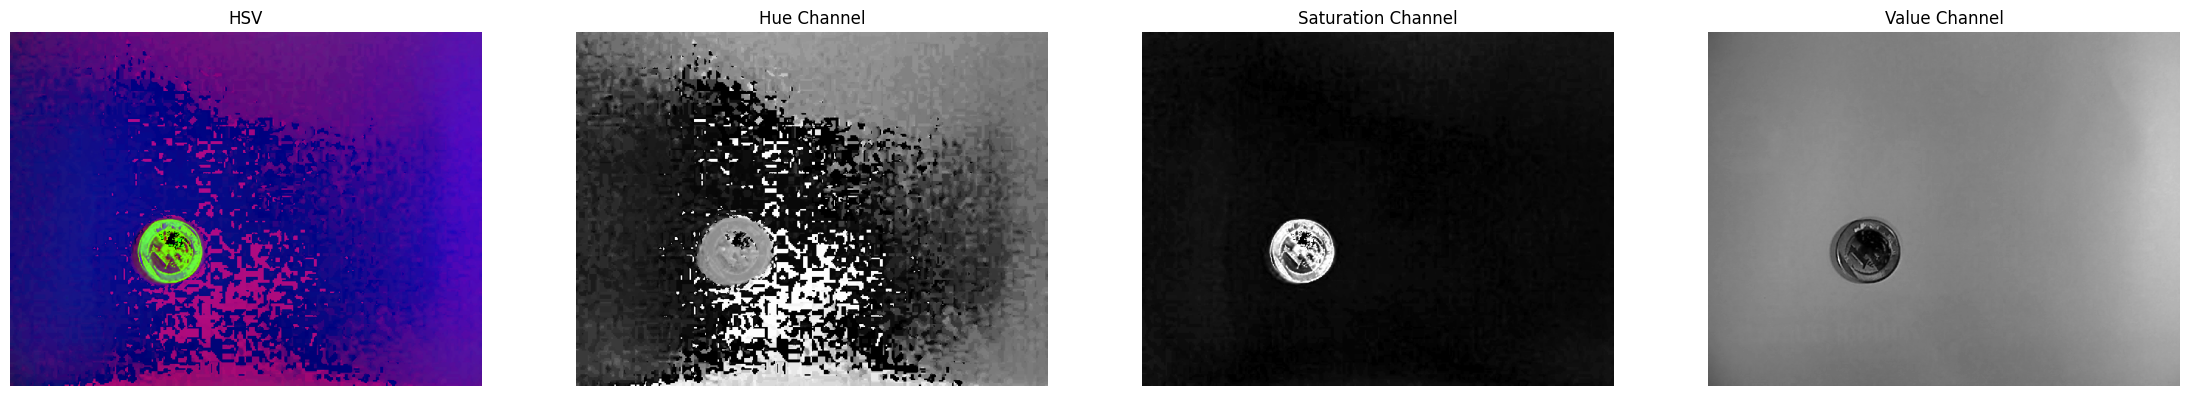

In [ ]:
for moeda in moedas:
    hsv = cv2.cvtColor(moeda, cv2.COLOR_BGR2HSV)
    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]
    plot_sidebyside([hsv, H, S, V], ["HSV", "Hue Channel","Saturation Channel","Value Channel"], colormap='gray', figsize=(28,24))

Discussão:

Para fim de testar o uso dos métodos abrangentes, selecionamos apenas 10 imagens
iniciais aleatoriamente, mais especificamente duas de cada tipo, e assim averiguar quais funções mais se adaptavam a fim de resolver o problema.

Ao implementar o HSV e ao analisar cada canal de cor (Hue Channel, Saturation Channel e Value Channel) gerado, podemos concluir que as moedas possuem bastante contraste em relação ao fundo, ou seja, a saturação das moedas é alta. Portanto escolhemos o canal de saturação do HSV para posteriormente separar a moeda do resto da imagem.

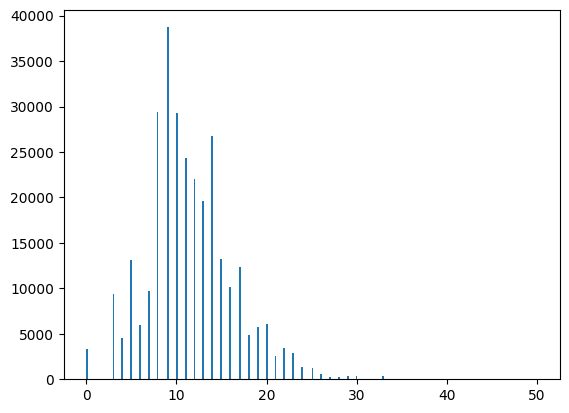

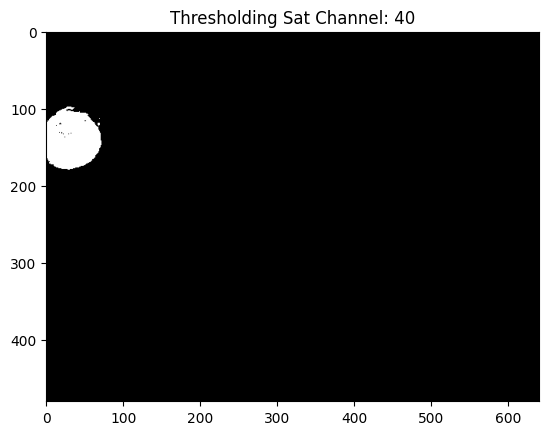

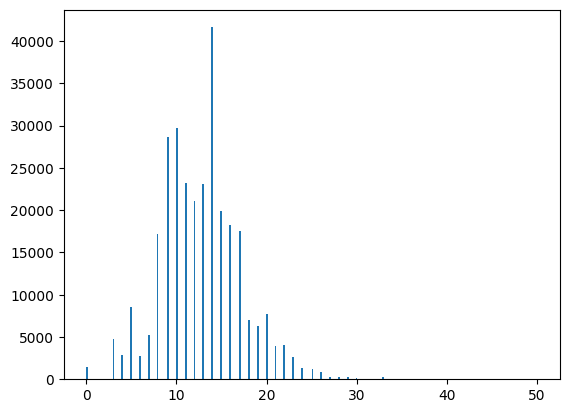

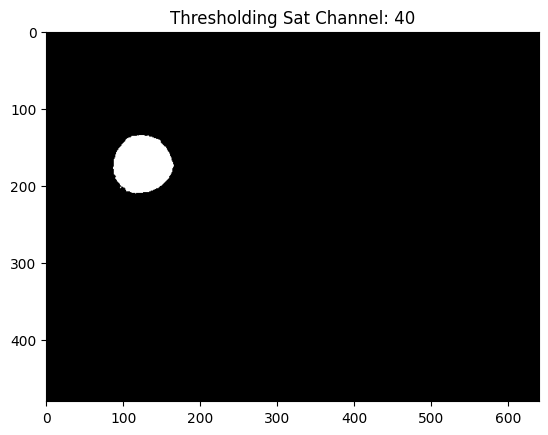

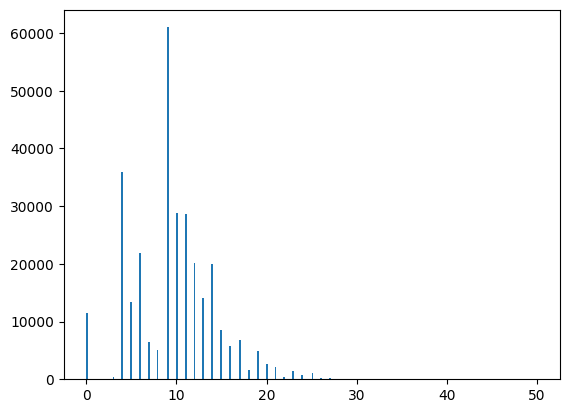

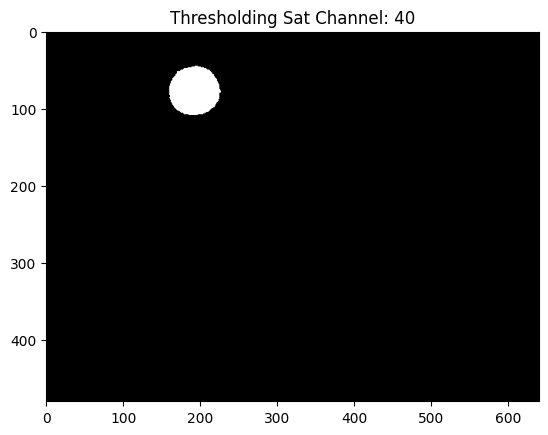

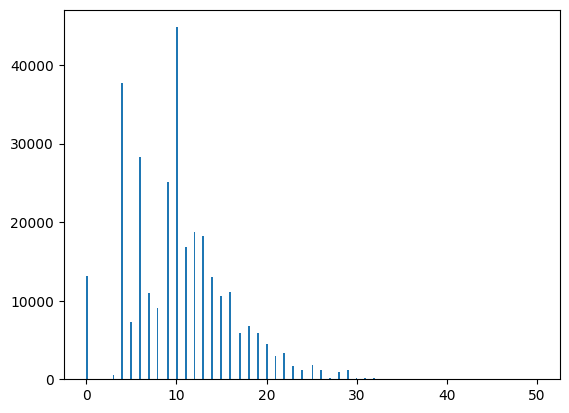

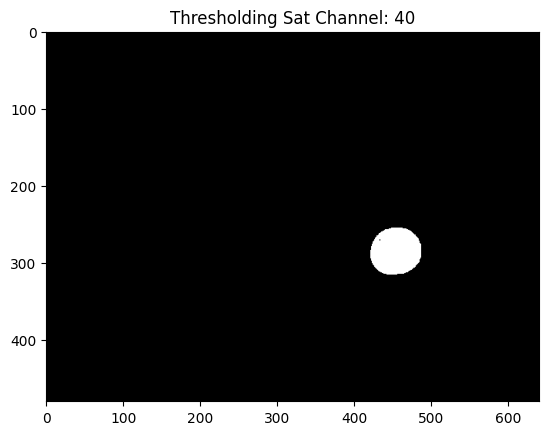

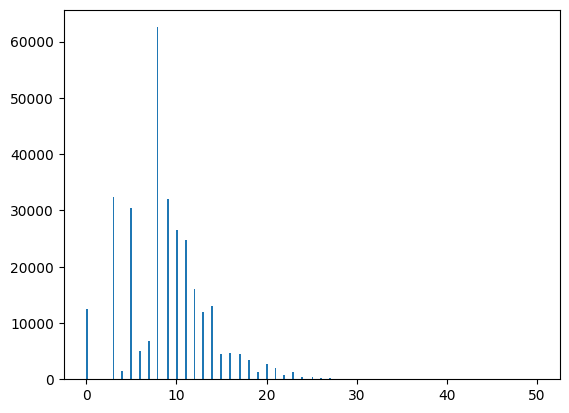

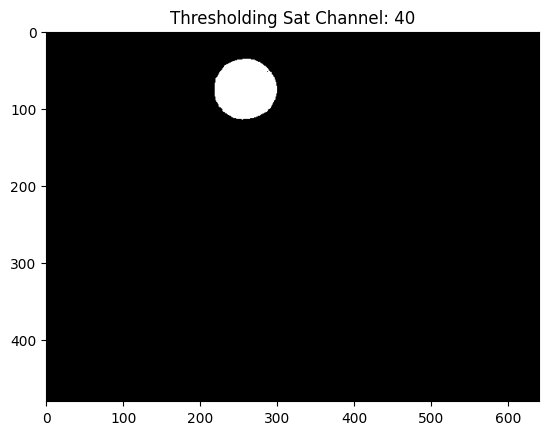

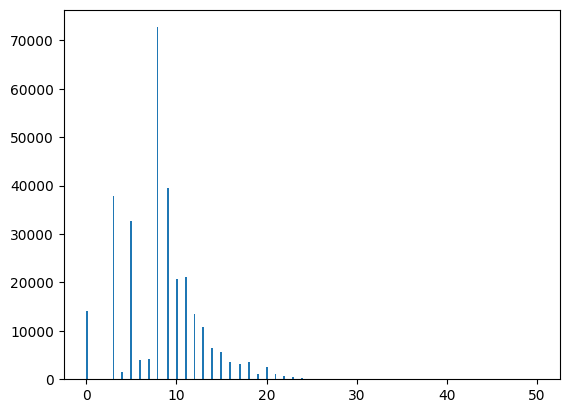

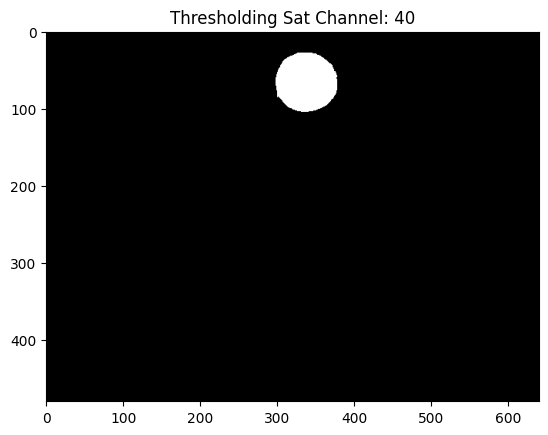

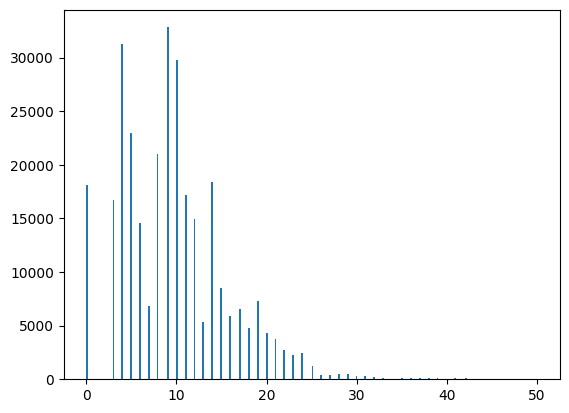

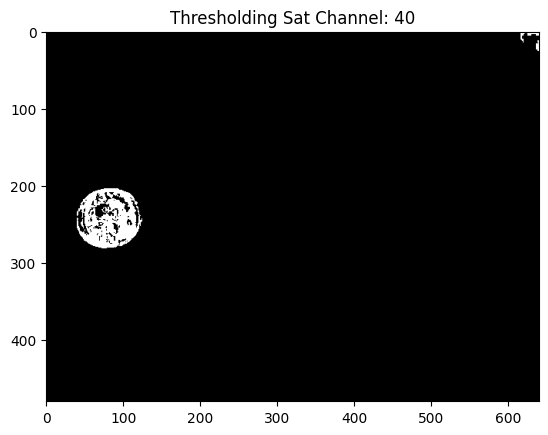

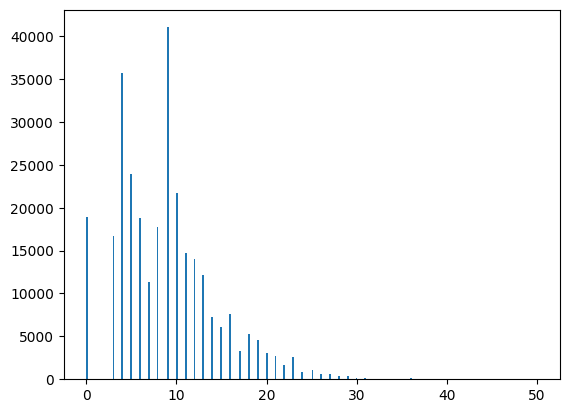

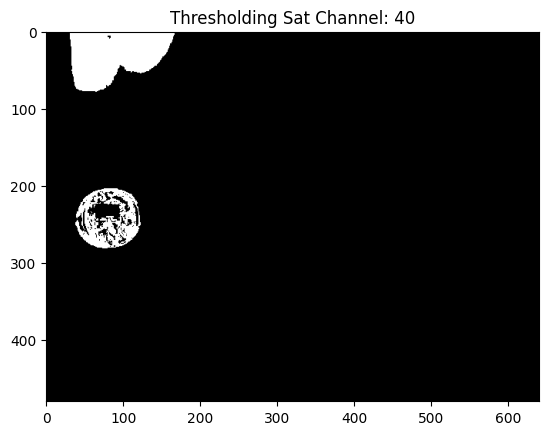

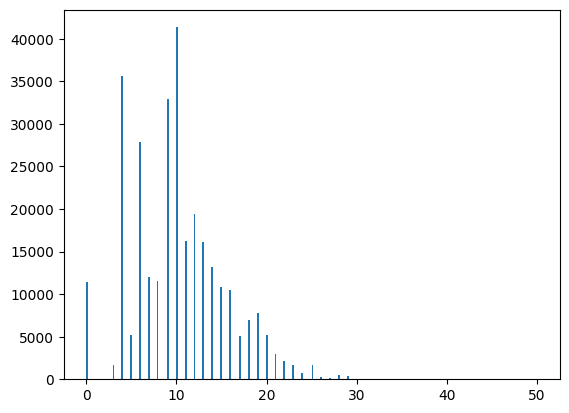

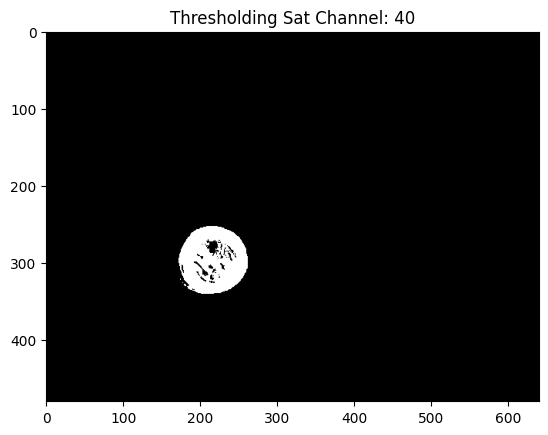

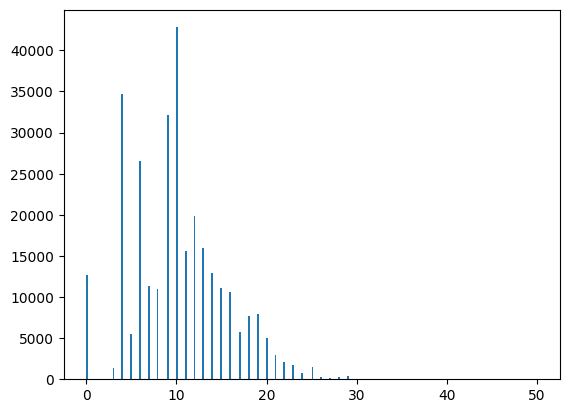

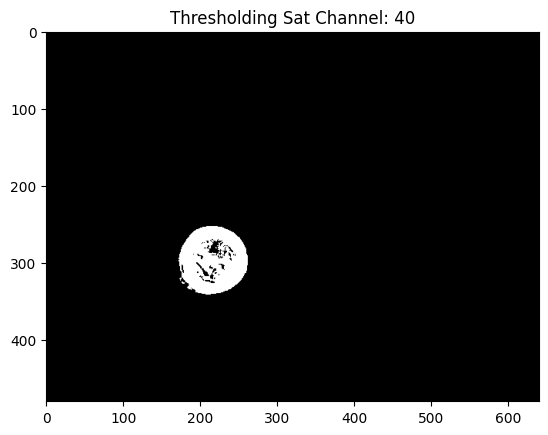

In [ ]:
moedas_S = []

for moeda in moedas:
    hsv = cv2.cvtColor(moeda, cv2.COLOR_BGR2HSV)
    S = hsv[:,:,1]
    plt.hist(S.ravel(), 256, [0,50]);
    plt.show()

    val = 40
    _, thresh = cv2.threshold(S, val, 256, cv2.THRESH_BINARY)
    plt.title("Thresholding Sat Channel: " + str(val))
    plt.imshow(thresh,cmap='gray')
    plt.show()

    moedas_S.append(thresh)


Discussão:

Inicialmente, pegamos a imagem e plotamos um histograma da saturação. Como a moeda possui maior saturação, estavamos procurando um "limite superior" para o fundo da imagem. Utilizando o valor do histograma (20) fomos incrementando até ter uma imagem limpa

Logo após, foi implementado a binariação da imagem com o canal de saturação do HSV e separamos a moeda do resto da imagem.



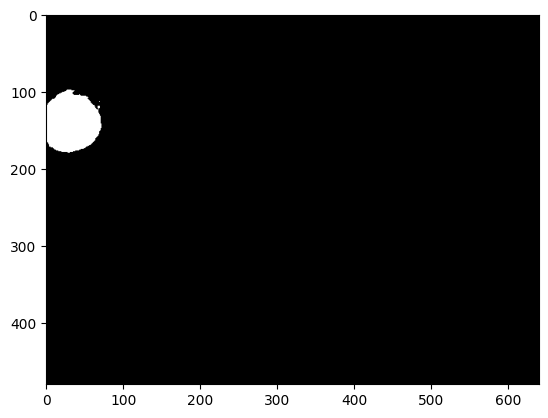

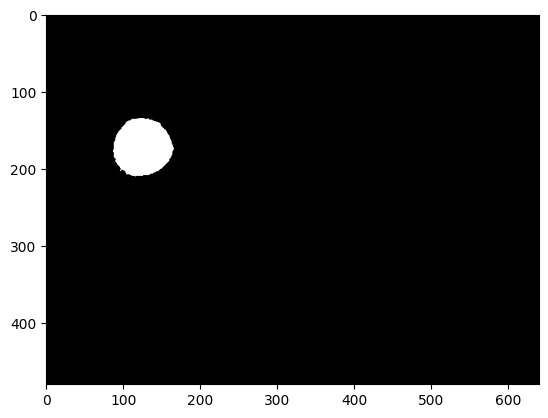

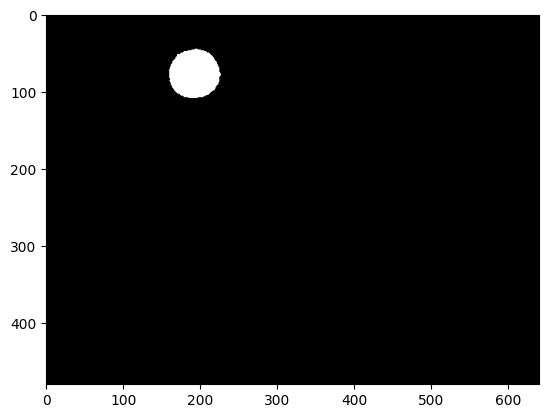

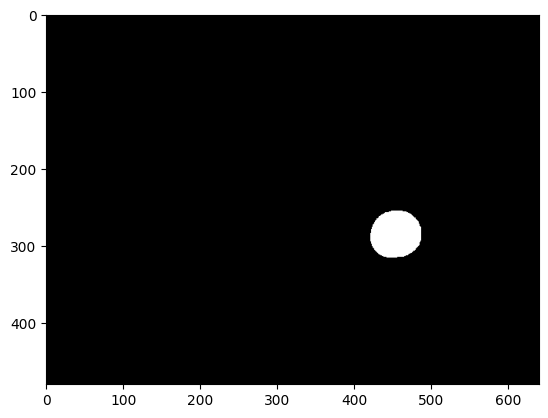

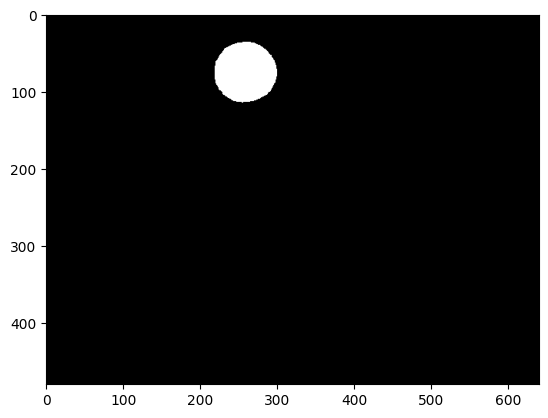

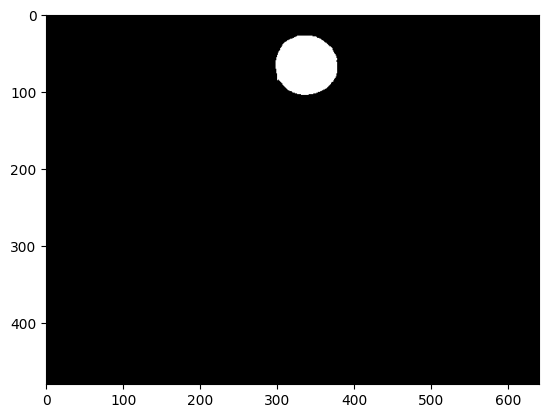

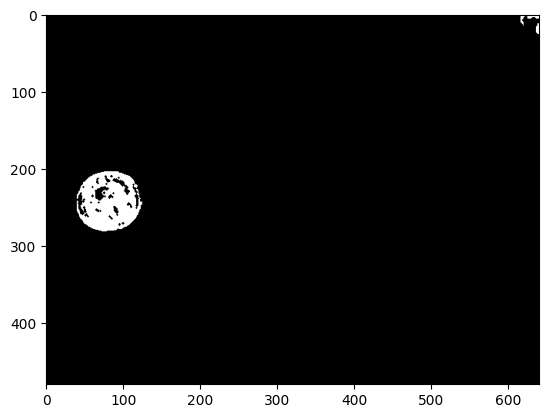

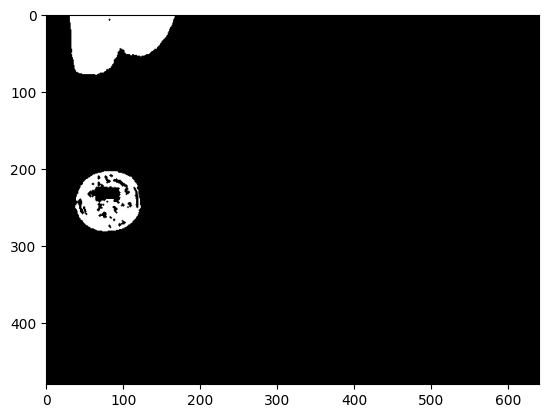

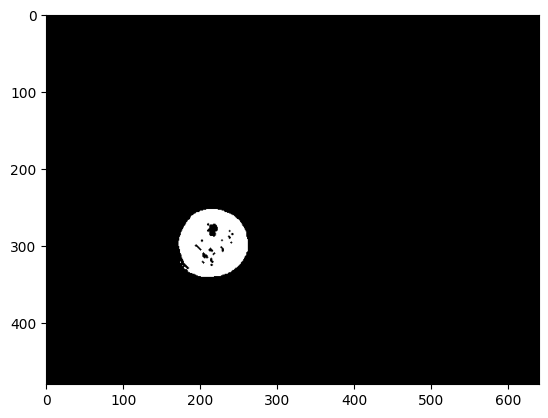

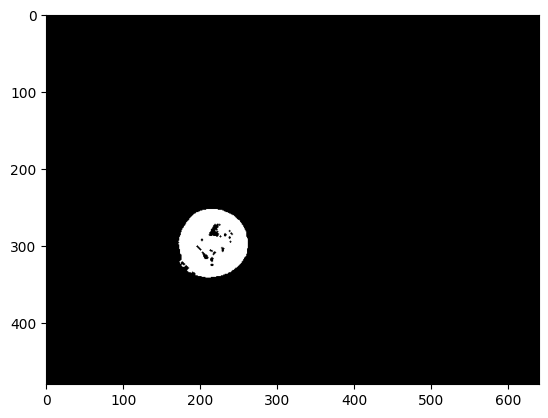

In [ ]:
#ellipse
k_ellipse = np.array([[0,0,1,1,1,0,0],
                     [0,1,1,1,1,1,0],
                     [1,1,1,1,1,1,1],
                     [1,1,1,1,1,1,1],
                     [1,1,1,1,1,1,1],
                     [0,1,1,1,1,1,0],
                     [0,0,1,1,1,0,0]], dtype=np.uint8)

def create_ellipse_matrix(size, a, b):
    # Initialize an empty matrix filled with zeros
    matrix = np.zeros((size, size), dtype=int)

    # Calculate the center of the matrix
    center = (size - 1) / 2

    # Iterate through each element in the matrix
    for i in range(size):
        for j in range(size):
            # Calculate the distance from the current element to the center
            distance = ((i - center) / a) ** 2 + ((j - center) / b) ** 2

            # If the distance satisfies the ellipse equation, set the element to 1
            if distance <= 1:
                matrix[i, j] = 1

    return matrix

moedas_preprocessadas = []

for moeda in moedas_S:
    kernel = np.array(create_ellipse_matrix(17,1,1), dtype=np.uint8)
    im_erode = cv2.dilate(moeda,kernel)
    im_open = cv2.erode(im_erode,kernel)
    plt.imshow(im_open,cmap='gray')
    plt.show()
    moedas_preprocessadas.append(im_open)

Discussão:

Com a imagem binarizada, utilizamos filtros de dilatação e erosão para preencher o interior das moedas e preservar o formato circular da moeda. Utilizamos uma função para gerar um Kernel eliptico, dessa forma testamos com tamanhos diferentes de Kernel para obter o melhor preenchimento

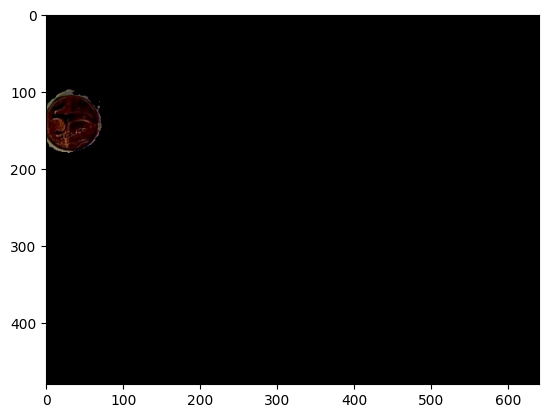

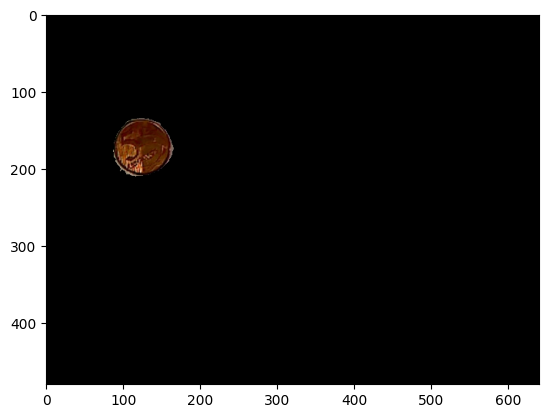

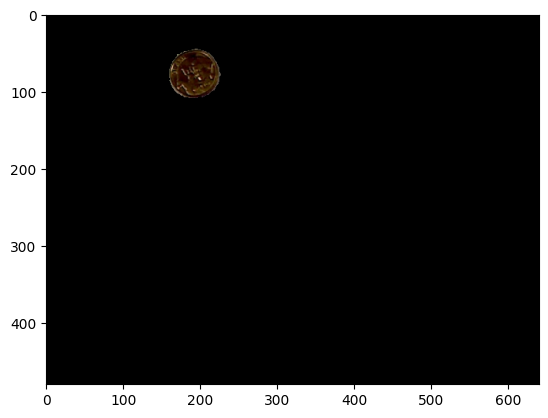

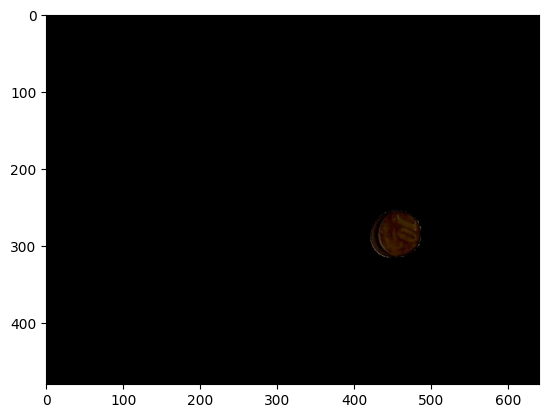

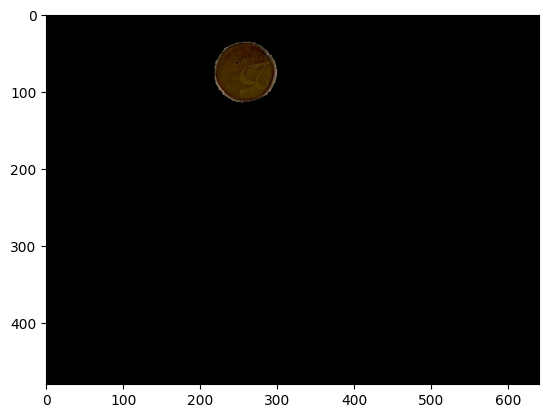

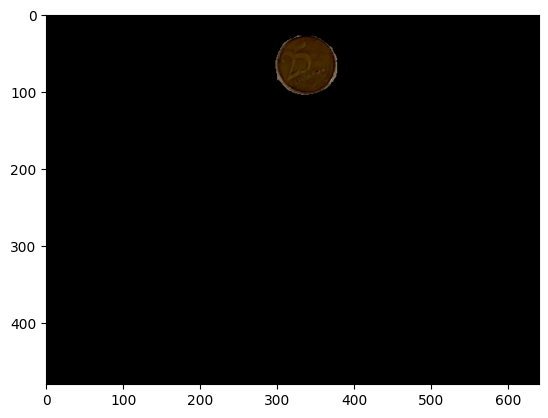

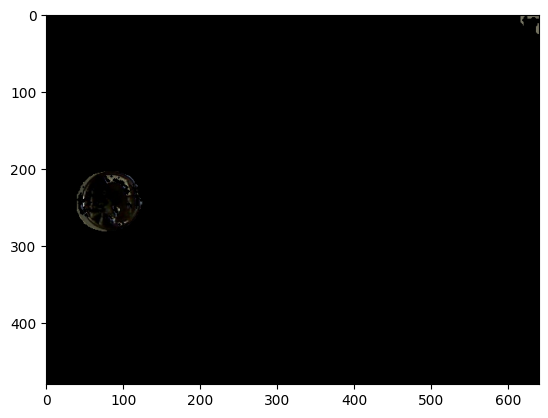

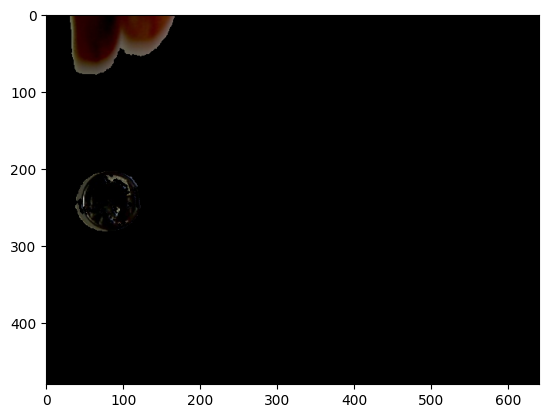

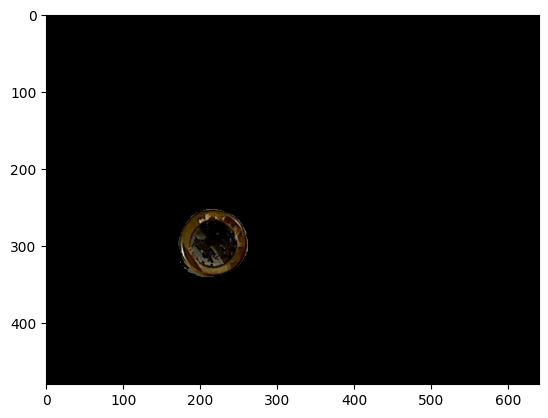

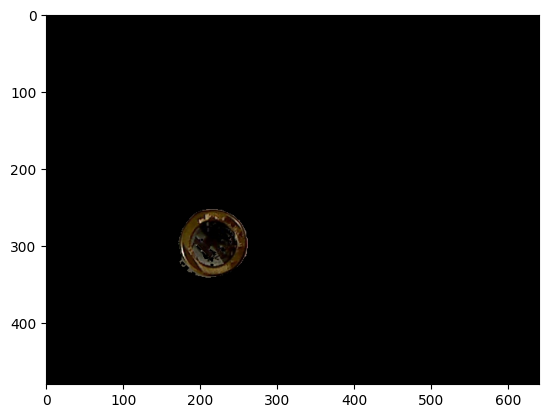

In [ ]:
for moeda_pre, moeda_plate in zip(moedas_preprocessadas, moedas):
    result = cv2.bitwise_and(moeda_plate, moeda_plate, mask= moeda_pre)
    plt.imshow(result, cmap='gray')
    plt.show()

Discussão:

Validar que a mascará está no local certo da imagem e contém a moeda inteira

In [ ]:
connectivity = 4  # You need to choose 4 or 8 for connectivity type
num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(im_open , connectivity , cv2.CV_32S)
print('Total Labels:', num_labels)
print(np.unique(cc_image))

Total Labels: 2
[0 1]


Discussão:

Como possuímos a imagem binarizada, decidimos tentar encontrar os componentes presentes. Esse método retorna uma lista com todos os componentes (grupos de pixels conectados) que passaram pela binarização

#Detecção de Componente e Marcação
Aqui voce deve encontrar a região da moeda e extrair apenas ela. A Lecture 04 pode ser útil.

Dica: Utilize a informação de tamanho para eliminar componentes indesejáveis.

Ao final dessa seção produza um discussão sobre os resultados. Sempre bom discutir criticamente o que deu certo e o que deu errado, principalmente o que está impactando no processo.

In [ ]:
for im_open in moedas_preprocessadas:
    connectivity = 4  # You need to choose 4 or 8 for connectivity type
    num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(im_open , connectivity , cv2.CV_32S)
    for i in range(num_labels):
        temp = cc_image.copy()

        # temp[cc_image == i] = 255
        # temp[cc_image != i] = 0

        x,y,w,h = stats[i][:4]

        if w >= 100 or h >= 100 or w <= 40 or h <= 40:
            continue
        aspect = abs(1.0 - w/h)
        if aspect > 0.1:
            continue

        area = stats[i][4]
        cx,cy = centroids[i]
        component = img_plate[y:y+h, x:x+w]
        markup = cv2.rectangle(temp,(x,y),(x+w,y+h),(255,0,0),thickness=1)
        plt.imshow(temp,cmap='gray')
        plt.show()
        print(f"avg size: {(w+h)/2}; avg hue: {np.average(hsv[:,:,0])/255}; avg sat: {np.average(hsv[:,:,1])/255};  avg value: {np.average(hsv[:,:,2])/255}")

NameError: ignored

Discussão:

Após extrair os componentes passamos por cada componente encontrado para fazer validações. Excluimos componentes que tenham comprimento ou largura muito grande. Essa exclusão ajuda a tirar ruido como as mãos e sombras que aparecem no canto das imagens.

Também são excluidas imagens que o Aspect Ratio seja mais de 10% diferente de 1:1. Isso ajuda a excluir componentes que não sejam proximo de quadrados (ou nesse caso, circulares).

Finalmente, para os compoenentes que passam a validação calculamos o diametro médio e o Hue médio da moeda

Nossa hipotese era de classificar as moedas utilizando o tamanho e a cor.

#Classificação (Ponto Extra)

Se voce desejar, implemente alguma técnica para determinar o valor da moeda. Neste momento, utilize apenas as informações que temos até agora, como cor, tamanhos, quantidade de pixeis, etc.

Nesse caso, forneça uma matriz de confusão e acurácia para discutir os resultados.

A ideia é avaliarmos a limitação de uma abordagem rasa. Ainda que cabível, não utilize extratores de características e modelos de machine learning. Veremos isso mais adiante na disciplina.

In [ ]:
def detecta_moeda(image):
    #read image from disk
    img_plate = cv2.imread(image)
    #converts to rgb to better visualize
    img_plate = cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB)
    img_plate = cv2.bilateralFilter(img_plate,9,75,75)

    hsv = cv2.cvtColor(img_plate,cv2.COLOR_BGR2HSV)

    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]

    img = hsv[:,:,1]

    val = 40
    _,thresh = cv2.threshold(img,val,256,cv2.THRESH_BINARY)
    kernel = np.array(create_ellipse_matrix(17,1,1), dtype=np.uint8)
    im_erode = cv2.dilate(thresh,kernel)
    kernel = np.array(create_ellipse_matrix(8,1,1), dtype=np.uint8)
    im_open = cv2.erode(im_erode,kernel)

    connectivity = 4  # You need to choose 4 or 8 for connectivity type
    num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(im_open , connectivity , cv2.CV_32S)
    for i in range(num_labels):
        temp = cc_image.copy()

        temp[cc_image == i] = 255
        temp[cc_image != i] = 0

        x,y,w,h = stats[i][:4]

        if w >= 100 or h >= 100 or w <= 40 or h <= 40:
            continue
        aspect = abs(1.0 - w/h)
        if aspect > 0.1:
            continue

        area = stats[i][4]
        cx,cy = centroids[i]
        component = img_plate[y:y+h, x:x+w]
        markup = cv2.rectangle(temp,(x,y),(x+w,y+h),(255,0,0),thickness=1)
        plt.imshow(temp,cmap='gray')
        plt.show()
        print(f"avg size: {(w+h)/2}; avg hue: {np.average(hsv[:,:,0])/255}; avg sat: {np.average(hsv[:,:,1])/255};  avg value: {np.average(hsv[:,:,2])/255}")



In [ ]:
def get_number(image):
    #read image from disk
    img_plate = cv2.imread(image)
    #converts to rgb to better visualize
    img_plate = cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB)
    img_plate = cv2.bilateralFilter(img_plate,9,75,75)

    hsv = cv2.cvtColor(img_plate,cv2.COLOR_BGR2HSV)

    H = hsv[:,:,0]
    S = hsv[:,:,1]
    V = hsv[:,:,2]

    img = hsv[:,:,1]

    val = 40
    _,thresh = cv2.threshold(img,val,256,cv2.THRESH_BINARY)
    kernel = np.array(create_ellipse_matrix(17,1,1), dtype=np.uint8)
    im_erode = cv2.dilate(thresh,kernel)
    kernel = np.array(create_ellipse_matrix(8,1,1), dtype=np.uint8)
    im_open = cv2.erode(im_erode,kernel)

    connectivity = 4  # You need to choose 4 or 8 for connectivity type
    num_labels, cc_image, stats, centroids = cv2.connectedComponentsWithStats(im_open , connectivity , cv2.CV_32S)
    for i in range(num_labels):
        temp = cc_image.copy()

        temp[cc_image == i] = 255
        temp[cc_image != i] = 0

        x,y,w,h = stats[i][:4]

        if w >= 100 or h >= 100 or w <= 40 or h <= 40:
            continue
        aspect = abs(1.0 - w/h)
        if aspect > 0.1:
            continue

        area = stats[i][4]
        cx,cy = centroids[i]
        component = img_plate[y:y+h, x:x+w]
        return ((w+h)/2, (np.average(component[:,:,0])/360))


Discussão:

A função acima aplica os filtros explicados anteriormente e retorna o diametro e hue médio

In [ ]:
c10 = []
for im in glob.glob("moedas/10_*.jpg"):
    value = get_number(im)
    if value == None:
        continue
    c10.append(get_number(im))
c5 = []
for im in glob.glob("moedas/5_*.jpg"):
    value = get_number(im)
    if value == None:
        continue
    c5.append(get_number(im))
c50 = []
for im in glob.glob("moedas/50_*.jpg"):
    value = get_number(im)
    if value == None:
        continue
    c50.append(get_number(im))
c25 = []
for im in glob.glob("moedas/25_*.jpg"):
    value = get_number(im)
    if value == None:
        continue
    c25.append(get_number(im))
c100 = []
for im in glob.glob("moedas/100_*.jpg"):
    value = get_number(im)
    if value == None:
        continue
    c100.append(get_number(im))

In [ ]:
stats5 = np.average(list(map(lambda a: a[0],c5))),np.average(list(map(lambda a: a[1],c5)))
stats10 = np.average(list(map(lambda a: a[0],c10))),np.average(list(map(lambda a: a[1],c10)))
stats25 = np.average(list(map(lambda a: a[0],c25))),np.average(list(map(lambda a: a[1],c25)))
stats50 = np.average(list(map(lambda a: a[0],c50))),np.average(list(map(lambda a: a[1],c50)))
stats100 = np.average(list(map(lambda a: a[0],c100))),np.average(list(map(lambda a: a[1],c100)))

Discussão:

Para iniciar a classificação, passamos por cada classe de moeda e calculamos duas estatisticas (diametro médio e hue médio)

In [ ]:
def guess_number(stats):
    if stats == None:
        return 0

    prox5 = abs(1 - stats[0]/stats5[1]) + abs(1 - stats[1]/stats5[1]) / 2
    prox10 = abs(1 - stats[0]/stats10[1]) + abs(1 - stats[1]/stats10[1]) / 2
    prox25 = abs(1 - stats[0]/stats25[1]) + abs(1 - stats[1]/stats25[1]) / 2
    prox50 = abs(1 - stats[0]/stats50[1]) + abs(1 - stats[1]/stats50[1]) / 2
    prox100 = abs(1 - stats[0]/stats100[1]) + abs(1 - stats[1]/stats100[1]) / 2

    value = min(prox10, prox5, prox50, prox25, prox100)
    if value == prox10:
        return 10
    if value == prox5:
        return 5
    if value == prox50:
        return 50
    if value == prox25:
        return 25
    if value == prox100:
        return 100

Discussão:

A função para fazer a classificação utiliza as métricas de Hue médio e diametro para encontrar qual classe de moeda mais se aproxima da instancia para ser classificada. A classe da instancia vai ser atribuida baseado em qual classe a instancia tem razão mais proxima a 1

In [ ]:
Y_real = []
Y_pred = []

prev_moedas = {}

for im in glob.glob("moedas/*.jpg"):
    Y_real.append(int(im.split("/")[1].split("_")[0]))
    Y_pred.append(guess_number(get_number(im)))

    prev_moedas[im] = guess_number(get_number(im))

In [ ]:
cont = 0
top_name_moedas = []
top_value_moedas = []
for chave, valor in prev_moedas.items():
    if valor == 0 and cont <= 10:
        top_name_moedas.append(chave)
        top_value_moedas.append(valor)
        cont += 1
    if cont > 10:
        break

<Axes: >

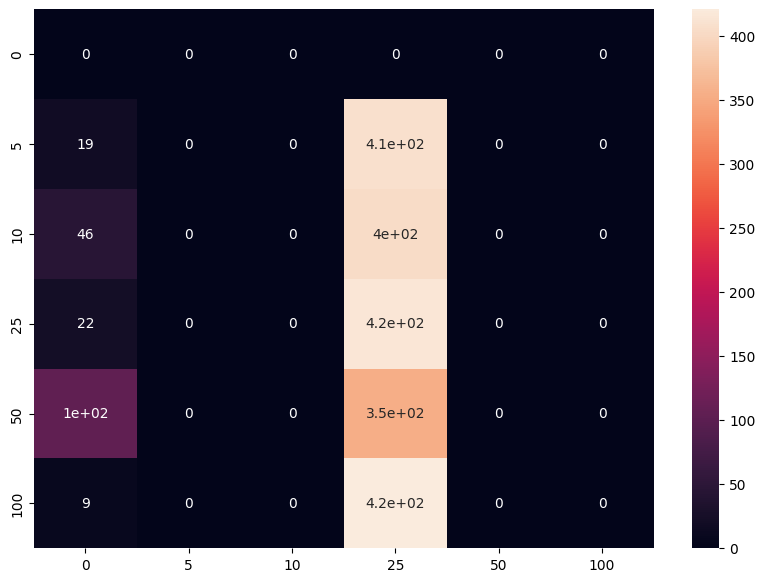

In [ ]:
cm = confusion_matrix(Y_real,Y_pred)
df_cm = pd.DataFrame(cm, index = [0,5,10,25,50,100], columns = [0,5,10,25,50,100])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

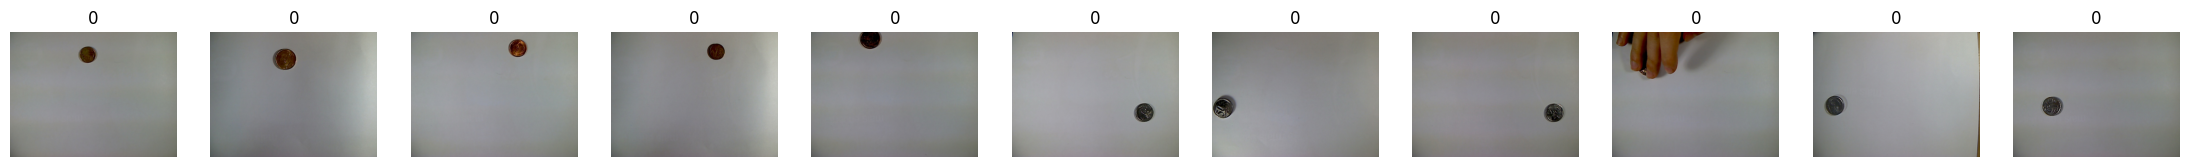

In [ ]:
moedas_finais = []

for moeda in top_name_moedas:
    img_plate = cv2.imread(moeda)
    moedas_finais.append(cv2.cvtColor(img_plate,cv2.COLOR_BGR2RGB))

plot_sidebyside(moedas_finais, top_value_moedas, figsize=(28,24))

Discussão:

Para a geração da Matriz de confusão, utilizamos os labels reais contra os labels que foram atribuidos pela classificação. Como podemos ver, a taxa de acerto ficou proxima a 20%

Após a matriz de confusão plotamos 10 imagens onde foram classificadas como 0, ou seja, e ao observa-las chegamos na conclusão que o algoritmo que desenvolvemos não conseguiu classifica-las apenas com com o Hue médio e o diâmetro médio das moedas.

In [ ]:
!ls -l moedas/ | wc -l
# Total de imagens

2205


#Conclusão

Produza aqui uma discussão geral sobre o trabalho. Dificuldades encontradas, problemas, etc. A seguir algumas perguntas para nortear

1. Na parte de pré-processamento

    a) Que tipos de ruído estavam presentes?
    
    Resposta: Ao observar as imagens foram identicados alguns ruídos como: Mão, luminosidades, sombras, fotos registradas com zoom diferente

    b) Qual o problema de utilizar apenas um threshold global para segmentação?
    
    Resposta: O Problema de utilizar um threshold global é não utilizar nenhuma característica especifica, ou seja, ao invés de fazer a separação usando um “canal” especifico que possua melhor “ganho de informação”, o ganho de informação é pior por utilizar canais que não possuem tanta separação entre o objeto e o fundo.

    c) Descreva em poucas linhas a estratégia implementada
    
    Resposta: Primeiro analisamos a imagem utilizando HSV, nessa análise descobrimos que o canal de saturação apresenta melhor separação entre a moeda e o fundo. Após plotar o histograma definimos o valor para o threshold (40). Depois percebemos que as moedas não estavam vindo preenchidas, decidimos então fazer uma dilatação para preencher o interior da moeda e uma erosão para manter o formato circular e as bordas.

    d) Cite algums problemas que você não conseguir tratar

    Resposta: Não conseguimos tratar casos em que a moeda estava parcialmente obstruída, quando a iluminação estava diferente (menos contraste com a moeda)


2. Detecção de Componente

    a) Que estratégia foi utilizada para detectar os componentes?

    Resposta: Para a detecção de componentes usamos componentes conexos com stats e CV_32S e com a conectividade de 4 direções.

    b) Você utilizou alguma informação para filtrar componentes indesejáveis? Quais? (número de pixeis, tamanho, etc)

    Resposta: Foi utilizado tamanho do bounding box (40 < tamanho do lado < 100) e aspect ratio entre 0.9:1 e 1.1:1.  alguns casos a perspectiva da moeda “foreshortening” faz com que a projeção da moeda tenha  aspect ratio maior que 1.1:1 ou menor que 0.9:1 e portanto a moeda era excluída.

    c) O resultado foi satisfátorio? Discuta criticamente

    Resposta: O Resultado foi satisfatório. A taxa de detecção de moedas foi de aproximadamente 91.11%, ou seja, 9 em cada 10 moedas processadas são detectadas (bounding box) corretamente.

3. Classificação:

    a) Você implementou alguma forma de determina o valor da moeda? Como você fez?

    Resposta: Implementamos um método proximo ao k-means. Passamos por cada moeda e agregamos os valores de tamanho e hue, gerando um tamanho médio e hue médio para cada classe moeda. Para classificar uma moeda, analisamos a moeda e determinamos qual classe de moeda apresenta o valor percentual mais próximo à instancia sendo classificada.

    b) Qual foi a performance?

    Resposta: A taxa de acerto foi de 19.04%. Tendo uma base balanceada e um algoritmo de classificação “aleatório” teríamos uma taxa de acerto de aproximadamente 20%

    c) As características que temos visto até agora são suficientes?

    Resposta: Não, ainda há bastante ruído e outros fatores que influenciam na detecção. Por conta da perspectiva o tamanho da moeda não é consistente com o tamanho fisico e há muita reflexão especular que atrapalha a detecção de cor. Além disso notamos que as moedas de 5,10 e 25 centavos possuem Hue médio muito parecidos